In [1]:
# Load the required Libraries

import numpy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load scikit's random forest classifier library

from sklearn.ensemble import RandomForestClassifier


In [2]:
#Read the csv file using pandas

df = pd.read_csv("/Users/webiodev/Downloads/german_credit.csv")

In [3]:
#Get information on data

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    10

In [4]:
#Split the data into X features and Target

X = df.iloc[:,1:]
target = df['Creditability']

In [5]:
#Split the data into Train and Test sets

X_train, X_test, Y_train, Y_test = train_test_split(X,target,test_size=0.3,random_state=123)

In [6]:
#Random Forest model from Sk-Learn

model = RandomForestClassifier(n_estimators=100).fit(X_train,Y_train)

In [7]:
#Making predictions on the test set

y_pred = model.predict(X_test)

In [8]:
#Checking the accuracy of the model

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:" ,accuracy*100)

Accuracy: 75.33333333333333


Text(0.5, 69.0, 'Predicted')

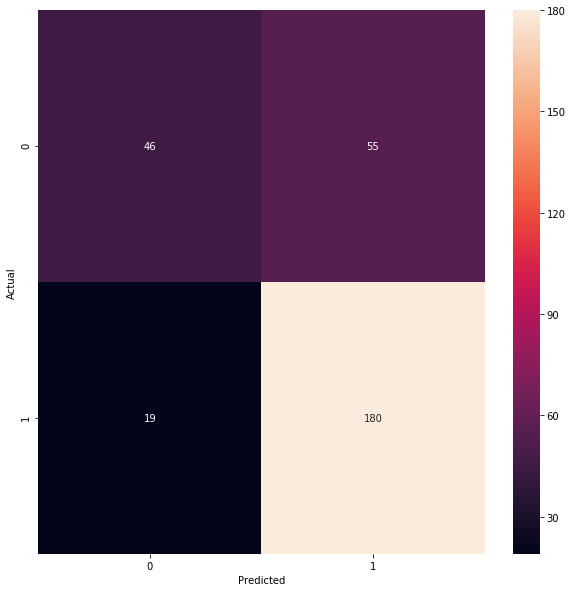

In [9]:
#Confusion Matrix to visualize our results

conf_mat = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [10]:
#Evaluation of our model using K-Fold Cross Validation

kfold = KFold(n_splits=10, random_state=123)
cv_results = cross_val_score(RandomForestClassifier(n_estimators=100), X,target, cv=kfold, scoring='accuracy')
result = "%s: %f" % ('Random Forest Classifier Accuracy', cv_results.mean()*100)
print(result)


Random Forest Classifier Accuracy: 67.800000
